# Nutrient Composition - Dimension Reduction

In [2]:
#Importing all the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [3]:
#Read the csv file to a pandas dataframe
df = pd.read_csv('nutrientcomposition_new.csv')

In [4]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [6]:
#Dropping the 'S.No' & 'Product' column
df.drop(['S.No', 'Product'], axis=1, inplace=True)
df.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


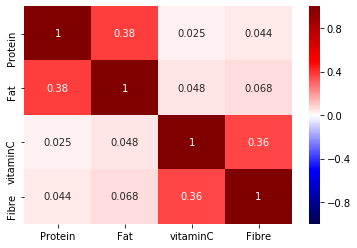

In [7]:
#Heatmap of the data
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

#### Using visualization, 'Protein' & 'Fat' can be collapsed into one dimension. 'vitaminC' & 'Fibre' can be collapsed into another dimension.  

In [8]:
#Factor Analysis
from factor_analyzer import Rotator, FactorAnalyzer
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation=None, rotation_kwargs={},
               use_smc=True)

In [9]:
#Factor Loadings
fa.loadings_

array([[ 0.49309677, -0.37116492,  0.01758062,  0.        ],
       [ 0.51881757, -0.34156493, -0.01667944,  0.        ],
       [ 0.39258267,  0.45405218,  0.01905316,  0.        ],
       [ 0.41755929,  0.43581139, -0.01795026,  0.        ]])

In [10]:
#Eigen values of the eigen vectors
fa.get_eigenvalues()

(array([1.46579112, 1.27924331, 0.6380622 , 0.61690336]),
 array([ 8.40793694e-01,  6.50525609e-01,  1.27318856e-03, -2.02846864e-06]))

#### Using the Factor Analysis, the two eigen vectors with eigen values more than 1 can be shortlisted. Therefore, the number of factors that can be chosen is 2.

In [11]:
#Iteration 2 - Factor Analysis
fa1 = FactorAnalyzer(n_factors=2, rotation=None)
fa1.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation=None, rotation_kwargs={},
               use_smc=True)

In [12]:
#Factor Loadings
fa1.loadings_

array([[ 0.48663393, -0.36602832],
       [ 0.52433788, -0.34738302],
       [ 0.38682998,  0.4449236 ],
       [ 0.42390904,  0.44386429]])

In [15]:
fa1.get_factor_variance()

(array([0.8410791 , 0.64962422]),
 array([0.21026978, 0.16240605]),
 array([0.21026978, 0.37267583]))

In [13]:
#Transform the data
fa1.transform(df)

array([[ 0.35901061,  0.64215522],
       [ 0.27947935, -0.98152519],
       [ 1.27680251,  1.32983986],
       ...,
       [-0.51659554, -0.06960426],
       [ 0.56568044, -0.04489703],
       [ 0.52127715, -0.20023042]])

In [16]:
#New data for further analysis
df1 = pd.DataFrame(fa1.transform(df), columns=('Weight Gaining Nutrients', 'Weight Reducing Nutrients'))
df1.head(50)

,Weight Gaining Nutrients,Weight Reducing Nutrients
0,0.359011,0.642155
1,0.279479,-0.981525
2,1.276803,1.329840
3,-0.799936,-0.404945
4,-1.098381,-0.104543
5,-0.590007,-0.343803
6,-0.475285,0.280830
7,-0.300718,-0.448477
8,0.133684,0.206518
9,-0.698236,0.479587
